In [5]:
!pip -q install plotly --upgrade

     |████████████████████████████████| 15.3 MB 5.1 MB/s 


In [6]:
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph
from sklearn import tree
import matplotlib.pyplot as plt # To create our Decision Tree Graph
import plotly.express as px # To create our Decision Tree Graph
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [7]:
import pandas as pd # For our DataFrame
import seaborn as sns # To create our Decision Tree Graph
import numpy as np # To create our Decision Tree Graph
import matplotlib.pyplot as plt # To create our Decision Tree Graph
import plotly.express as px # To create our Decision Tree Graph

base = pd.read_csv('/content/seattle-weather - seattle-weather.csv')

#Print/show the new data
base

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [8]:
base.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [9]:
np.unique(base['weather'], return_counts = True)

(array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object),
 array([ 53, 101, 641,  26, 640]))

In [10]:
for i in base.columns:
    print(i,len(base[i].unique()))

precipitation 111
temp_max 67
temp_min 55
wind 79
weather 5


In [11]:
base = base.mask(base == '.')

Separanco a base em entrada e saida


In [12]:
y_classe = base['weather']
y_classe

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [13]:
x_prev = base.iloc[:,:4].values
x_prev

array([[ 0. , 12.8,  5. ,  4.7],
       [10.9, 10.6,  2.8,  4.5],
       [ 0.8, 11.7,  7.2,  2.3],
       ...,
       [ 0. ,  7.2,  0.6,  2.6],
       [ 0. ,  5.6, -1. ,  3.4],
       [ 0. ,  5.6, -2.1,  3.5]])

Primeiro Teste - com RandomForestClassifier - sem pré-processamento

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_prev, y_classe, test_size=0.2, random_state=1)

In [15]:
from sklearn.ensemble import RandomForestClassifier 
modelo = RandomForestClassifier(random_state=0)
modelo.fit(X_train,y_train)
modelo_train = modelo.fit(X_train,y_train)
previsoes = modelo.predict(X_test)
previsoes

array(['sun', 'sun', 'fog', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain',
       'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun',
       'sun', 'fog', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'fog',
       'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'rain', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun',
       'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'fog', 'sun', 'rain',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun',
       'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain',
       'rain', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun',
       'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'rain', 'sun', 'sun', 'fog', 'sun', 'rain', 'rain',
       'sun', 'sun', 'rain', 'sun', 'sun', 'drizzle', 'rain', 'sun',
       'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rai

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.8122866894197952

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        11
         fog       0.50      0.14      0.22        29
        rain       0.95      0.95      0.95       128
        snow       1.00      0.17      0.29         6
         sun       0.74      0.94      0.83       119

    accuracy                           0.81       293
   macro avg       0.64      0.44      0.45       293
weighted avg       0.78      0.81      0.78       293



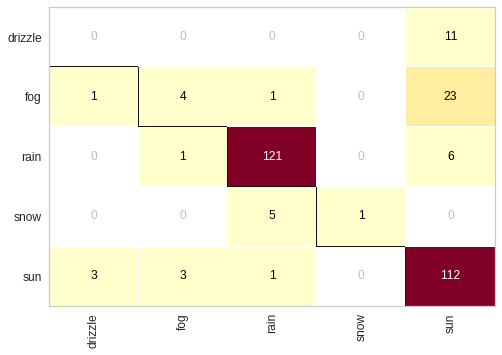

In [17]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
print(classification_report(y_test,previsoes))

In [18]:
base.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

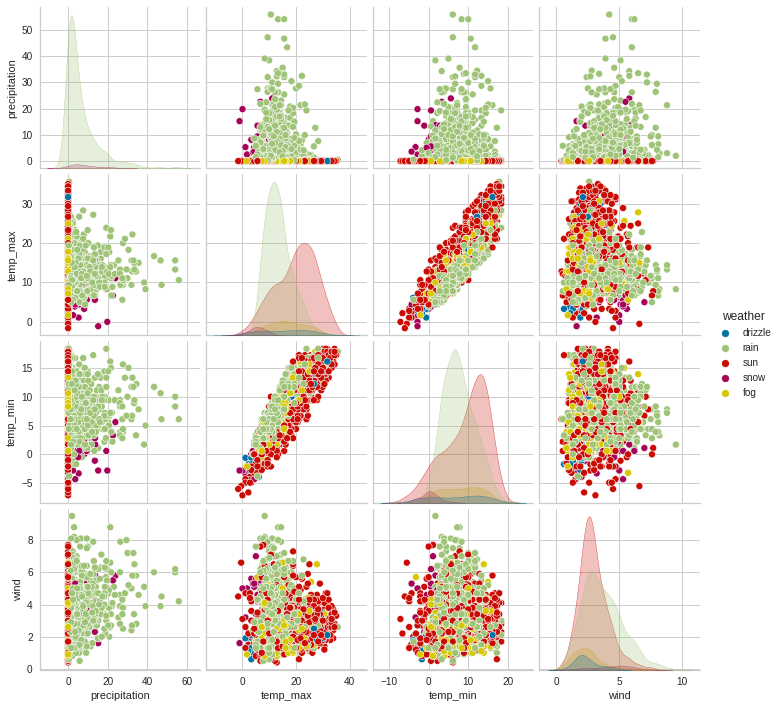

In [19]:
import seaborn as sns

# Mostrar o pair plot da base.
sns.pairplot(base, hue="weather")

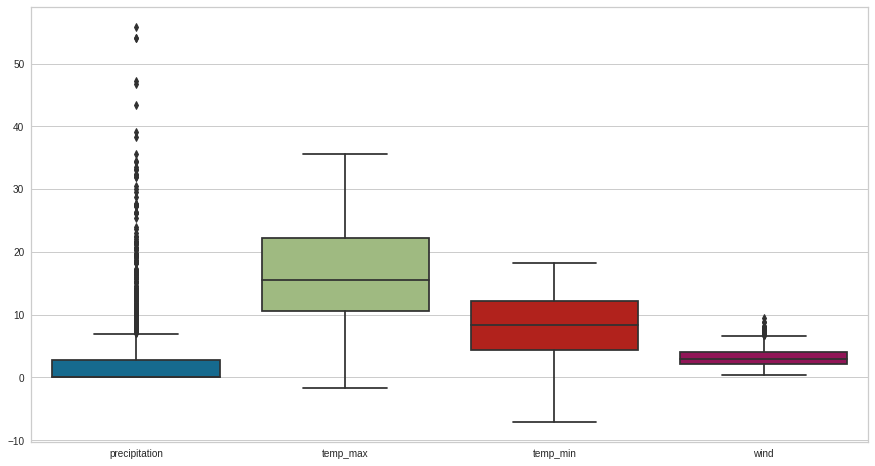

In [20]:
plt.figure(figsize=[15,8])
sns.boxplot(data=base)

Remoção de outliers

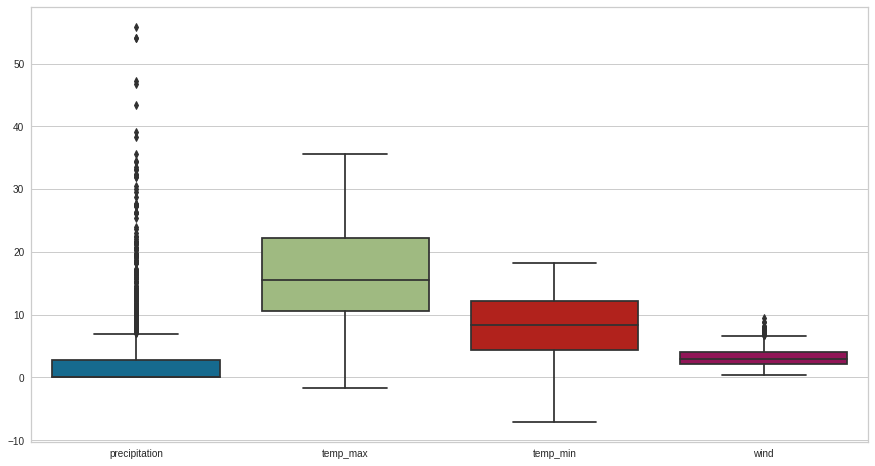

In [21]:
plt.figure(figsize=[15,8])
sns.boxplot(data=base)

In [22]:
base

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [23]:
def DistPlot(x, color):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    sns.distplot(x, bins=100, color=color)

In [24]:
y_classe = base['weather']
y_classe

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [25]:
x_prev = base.iloc[:,:4].values
x_prev

array([[ 0. , 12.8,  5. ,  4.7],
       [10.9, 10.6,  2.8,  4.5],
       [ 0.8, 11.7,  7.2,  2.3],
       ...,
       [ 0. ,  7.2,  0.6,  2.6],
       [ 0. ,  5.6, -1. ,  3.4],
       [ 0. ,  5.6, -2.1,  3.5]])

In [26]:
print(x_prev)

[[ 0.  12.8  5.   4.7]
 [10.9 10.6  2.8  4.5]
 [ 0.8 11.7  7.2  2.3]
 ...
 [ 0.   7.2  0.6  2.6]
 [ 0.   5.6 -1.   3.4]
 [ 0.   5.6 -2.1  3.5]]


In [27]:
import pandas as pd
from sklearn import preprocessing

x_prev = pd.DataFrame(x_prev)
min_max_scaler = preprocessing.MinMaxScaler()
x_prev

,0,1,2,3
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [28]:
base.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [29]:
from sklearn.model_selection import train_test_split
x_prev

,0,1,2,3
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [30]:
# X_train, X_test, y_train, y_test = train_test_split(x_prev, y_classe, test_size=0.2, random_state=1)

Segundo teste - RandomForestClassifier - com pré-processamento

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

modelo = RandomForestClassifier(criterion="gini",min_samples_split=6,n_estimators=125,random_state=26)

scores = cross_val_score(modelo, x_prev, y_classe, cv=10)
print('Acurácia nos k-folds:', scores)
print('Média das Acurácias: {:.2}, Desvio padrão: {:.2}'.format(np.mean(scores), np.std(scores)))
print("Acurácia: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Acurácia nos k-folds: [0.78911565 0.73972603 0.82191781 0.80136986 0.83561644 0.85616438
 0.88356164 0.8630137  0.88356164 0.89041096]
Média das Acurácias: 0.84, Desvio padrão: 0.046
Acurácia: 0.84 (+/- 0.09)


In [38]:
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']

scores = cross_validate(modelo, x_prev, y_classe, scoring=scoring, cv=10)
sorted(scores.keys())
['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
print("\n\ntest_precision_macro: ",scores['test_precision_macro'])
print("\n")
print("test_recall_macro: ",scores['test_recall_macro'])
print("\n\n")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr



test_precision_macro:  [0.41882503 0.55860806 0.48217054 0.54022989 0.55261886 0.64087676
 0.45538462 0.55420267 0.3502629  0.43518926]


test_recall_macro:  [0.559375   0.535625   0.575      0.39230769 0.45416667 0.56395833
 0.46041667 0.46041667 0.390625   0.52083333]





Terceiro teste - Árvore - com pré-processamento

In [39]:
from sklearn.model_selection import GridSearchCV

modelo = DecisionTreeClassifier(criterion='entropy',max_depth = 6,max_features = 0.8,random_state=20)
scores = cross_val_score(modelo, x_prev, y_classe, cv=10)
print('Acurácia nos k-folds:', scores)
print('\nMédia das Acurácias: {:.2}, Desvio padrão: {:.2}'.format(np.mean(scores), np.std(scores)))
print("\nAcurácia: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Acurácia nos k-folds: [0.79591837 0.71232877 0.83561644 0.82876712 0.85616438 0.87671233
 0.86986301 0.86986301 0.85616438 0.8630137 ]

Média das Acurácias: 0.84, Desvio padrão: 0.047

Acurácia: 0.84 (+/- 0.09)


In [40]:
scoring = ['precision_macro', 'recall_macro']
# modelo = DecisionTreeClassifier(criterion='entropy',max_depth = 4,max_features = 0.4,random_state=32)
scores = cross_validate(modelo, x_prev, y_classe, scoring=scoring, cv=10)
sorted(scores.keys())
['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
print("\n\ntest_precision_macro: ",scores['test_precision_macro'])
print("\n")
print("test_recall_macro: ",scores['test_recall_macro'])
print("\n\n")



test_precision_macro:  [0.41882503 0.55860806 0.48217054 0.54022989 0.55261886 0.64087676
 0.45538462 0.55420267 0.3502629  0.43518926]


test_recall_macro:  [0.559375   0.535625   0.575      0.39230769 0.45416667 0.56395833
 0.46041667 0.46041667 0.390625   0.52083333]





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr